In [3]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#### to make the output look nicer:

In [5]:
np.set_printoptions(suppress=True, precision = 2)

#### load the data:

In [183]:
df = pd.read_csv('nba_games_data.csv')
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


## Checking for empty columns

In [205]:
df.isnull().sum()

gameorder             0
game_id               0
lg_id                 0
_iscopy               0
year_id               0
date_game             0
seasongame            0
is_playoffs           0
team_id               0
fran_id               0
pts                   0
elo_i                 0
elo_n                 0
win_equiv             0
opp_id                0
opp_fran              0
opp_pts               0
opp_elo_i             0
opp_elo_n             0
game_location         0
game_result           0
forecast              0
notes            120890
dtype: int64

In [206]:
nba = df.copy()

# Data Analysis

#### data information:

In [207]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

## Calculate the points difference between all the teams:

In [208]:
nba['point_diff'] = nba['pts'] - nba['opp_pts']
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,point_diff
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN,-17


# Question 1:  Create two series from the 'pts' column of the nba_2010 and nba_2014 DF to represent the points scored per game by the Knicks Team and the Nets Team?

### Filter data to include only the 2010 and 2014 seasons

In [229]:
# 2010
nba_2010 = nba[nba.year_id == 2010]
# 2014
nba_2014 = nba[nba.year_id == 2014]

### Series for 2010:

In [227]:
knicks_pts = nba_2010[nba_2010['fran_id'] == 'Knicks']['pts']
nets_pts = nba_2010[nba_2010['fran_id'] == 'Nets']['pts']

# Question 2: Calculate the difference between the average points (mean) scored by the Knicks and the Nets in the 2010 season. Based on the difference, do you think the two teams and points ('pts') are associated?

In [228]:
diff_mean_2020 = knicks_pts.mean() - nets_pts.mean()
diff_mean_2020

9.731707317073173

In [226]:
# Based on the above finding:
# Difference in Points: The calculated differences of approximately 9.73 indicates that one team \
# scored, on average about 9.73 points more than the other team in 2010.

### Questions 3:  Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of `OVERLAPPING HISTOGRAM` that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?

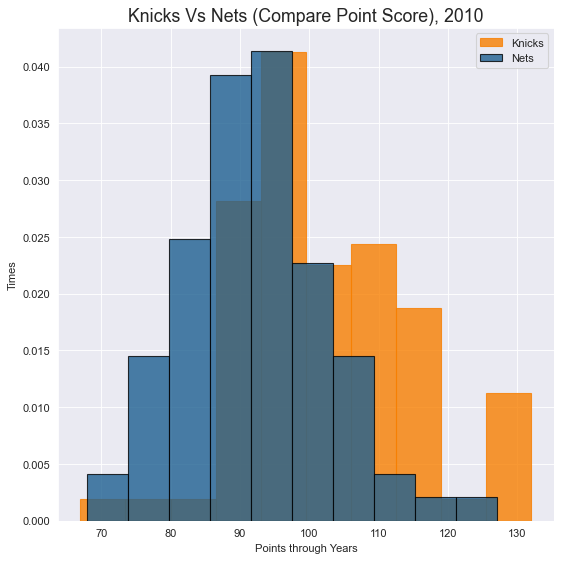

In [218]:
figure(figsize = (8, 8), dpi=80)
plt.hist(knicks_pts, color = '#f77f00', edgecolor = '#f77f00', alpha = 0.8, density = True, label = 'Knicks')
plt.hist(nets_pts, color = '#1e6091', edgecolor = 'black', alpha = 0.8, density = True, label = 'Nets')
plt.title('Knicks Vs Nets (Compare Point Score), 2010', fontsize = 16)
plt.xlabel('Points through Years')
plt.ylabel('Times')
plt.legend()
plt.show()

#### Explanation:

#### 1) Distribution of Scores: The histogram shows the frequency of points scored by both teams across different scoring ranges. The Knicks (in orange) and Nets (in blue) have overlapping distributions, but there are notable differences in their scoring patterns.
#### 2) Peak Scores: The Knicks have a peak around the 90-100 point range, indicating that they scored in this range more frequently. The Nets show a broader distribution with a peak around the 100-110 point range, suggesting they had more games scoring in this higher range.
#### 3) Frequency of Scores: The Nets have a higher frequency of games scoring between 100 and 110 points, indicating a more consistent scoring performance. The Knicks have a wider spread of scores, with a significant number of games scoring below 90 points, indicating variability and inconsistency in their scoring.
#### 4) Lower Scores: The Knicks have a noticeable frequency of games scoring below 90 points, which is less common for the Nets. This suggests that the Knicks struggled more in certain games.
#### 5) Overall Performance: The histogram suggests that the Nets had a more consistent and higher scoring performance in 2010 compared to the Knicks, who had more variability and lower scoring games.
#### Conclusion: Overall, the histogram provides a visual comparison of the scoring performance of the Knicks and Nets in 2010. It highlights the differences in their scoring consistency and effectiveness, with the Nets generally performing better in terms of points scored

### Quesion 4:  Comparing the 2010 games to 2014. Replicate the steps from Question 2 and 3 using `nba_2014`. First, calculate the mean difference between the two teams (Knick & Nets) points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the `OVERLAPPING HISTOGRAM`. Does the mean difference you calculated make sense?

In [230]:
knicks_pts_14 = nba_2014[nba_2014['fran_id'] == 'Knicks']['pts']
nets_pts_14 = nba_2014[nba_2014['fran_id'] == 'Nets']['pts']

In [231]:
diff_mean_2014 = knicks_pts_14.mean() - nets_pts_14.mean()
diff_mean_2014

0.44706798131809933

#### Visualization:

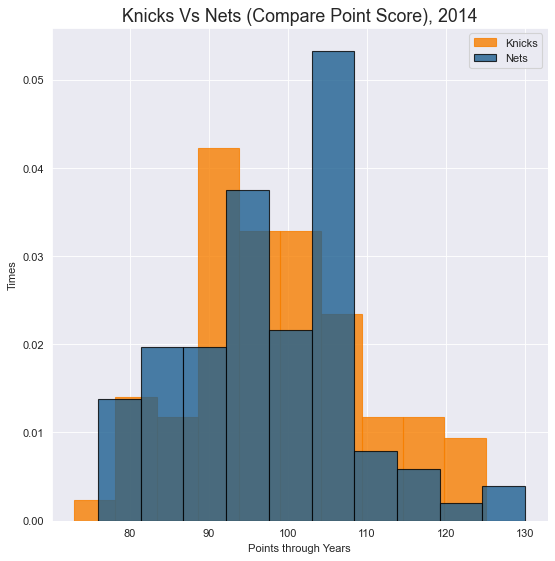

In [232]:
figure(figsize = (8, 8), dpi=80)
plt.hist(knicks_pts_14, color = '#f77f00', edgecolor = '#f77f00', alpha = 0.8, density = True, label = 'Knicks')
plt.hist(nets_pts_14, color = '#1e6091', edgecolor = 'black', alpha = 0.8, density = True, label = 'Nets')
plt.title('Knicks Vs Nets (Compare Point Score), 2014', fontsize = 16)
plt.xlabel('Points through Years')
plt.ylabel('Times')
plt.legend()
plt.show()

#### Explanation: Overlapping Histogram

#### 1) Distribution of Scores: The histogram shows the frequency of points scored by both teams across different scoring ranges. The Knicks (in orange) and Nets (in blue) have overlapping distributions.
#### 2) Peak Scores: The Nets have a higher peak around the 100-110 point range, indicating that they scored in this range more frequently than the Knicks. The Knicks show a peak around the 90-100 point range, suggesting that they scored less frequently in the higher ranges compared to the Nets.
#### 3) Frequency of Scores: The Nets have a more concentrated distribution, with a significant number of games scoring between 100 and 110 points. The Knicks have a broader distribution, with scores spread across a wider range, indicating more variability in their scoring.
#### 4) Lower Scores: The Knicks have a noticeable frequency of games scoring below 90 points, which is less common for the Nets. This could indicate that the Knicks struggled more in certain games.
#### 5) Overall Performance: The histogram suggests that the Nets had a more consistent and higher scoring performance in 2014 compared to the Knicks, who had more variability and lower scoring games.
#### Conclusion: the histogram provides a visual differences in their scoring consistency and effectiveness, with the Nets generally performing better in terms of points scored.

## Question 5: Using `nba_2010`, generate `side-by-side boxplots` with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?

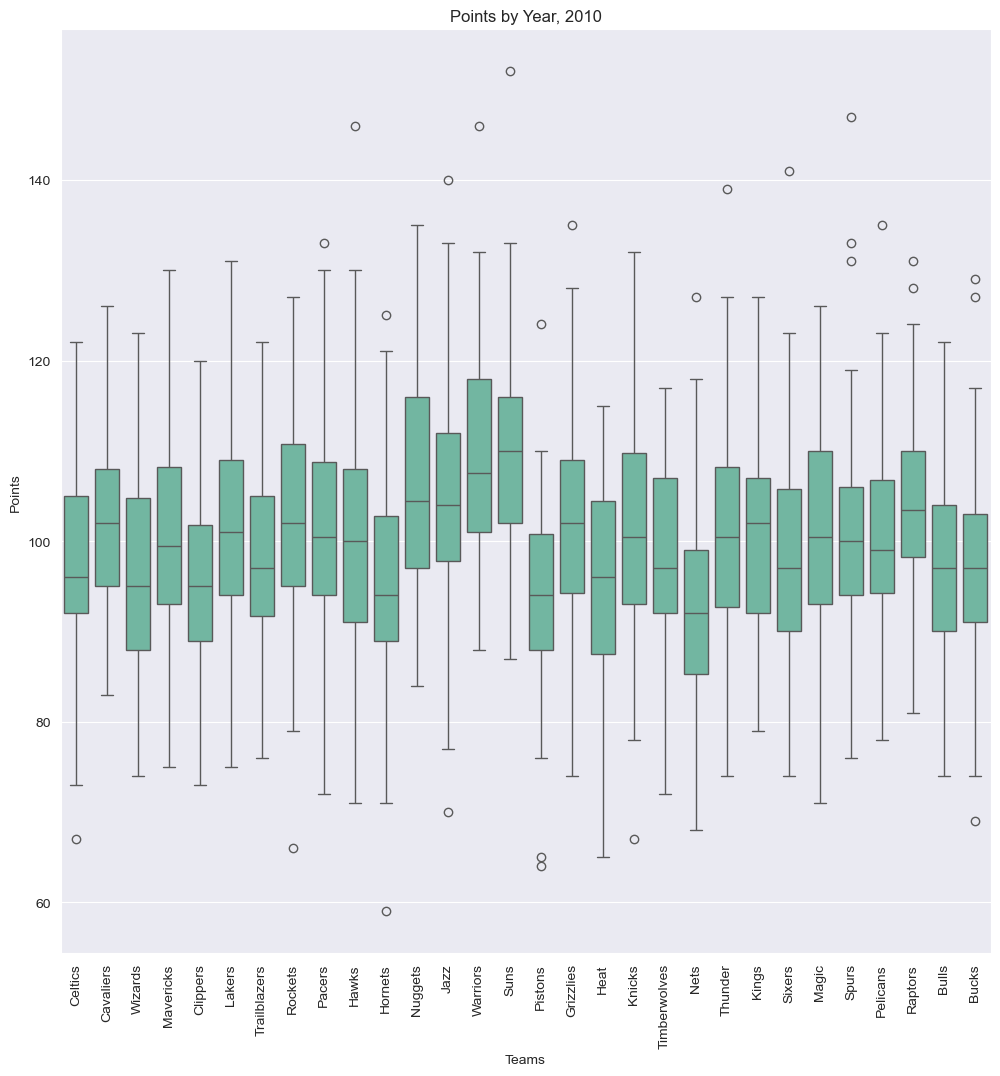

In [252]:
figure(figsize = (12, 12), dpi=100)
sns.boxplot(y = nba_2010.pts, x = nba_2010.fran_id)
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.title('Points by Year, 2010')
plt.xlabel('Teams')
plt.ylabel('Points')
plt.xticks(rotation = 90)

plt.show()

#### Explanation:

#### The boxplot you provided offers several insights into the distribution of points scored by different NBA teams over the years. Here’s what it indicates:
#### 1) Central Tendency: The line inside each box represents the median points scored by each team. This gives a quick visual indication of the typical performance of each team.
#### 2) Interquartile Range (IQR): The boxes represent the interquartile range (IQR), which contains the middle 50% of the data. A wider box indicates greater variability in points scored, while a narrower box suggests more consistent scoring.
#### 3) Outliers: Points outside the whiskers are outliers, indicating exceptional performances. For example, a team like the Golden State Warriors may have several high-scoring games that appear as outliers.
#### 5) Comparative Analysis: By comparing the boxes across teams, you can identify which teams score higher on average. Teams like the San Antonio Spurs may show a higher median, indicating stronger overall performance.
#### 6) Trends Over Time: If the boxplot is organized by year, it can reveal trends in scoring. For instance, if a team's box shifts upward over the years, it suggests improvement in scoring capabilities.
#### 7) Team Performance: Teams with consistently high median points and fewer outliers may indicate stronger overall performance, while teams with lower medians and more outliers may suggest inconsistency or weaker performance.
#### 8) Conclusion: the boxplot provides a comprehensive view of scoring patterns across teams, highlighting both central tendencies and variability.

## Question 6: Find out the frequency of more win, loss and its proportion using cross tablet or contingency table (2010)

#### Frequency:

In [234]:
print('Frequency:')
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

Frequency:


game_location,A,H
game_result,,
L,786,526
W,526,786


#### Proportion:

In [235]:
print('Proportion:')
location_result_proportion = location_result_freq/len(nba_2010)
location_result_proportion

Proportion:


game_location,A,H
game_result,,
L,0.299543,0.200457
W,0.200457,0.299543


### Question 7: Do `Game Location` and `Game Results` have an impact on each other? Calculate this using an `expected contingency table` and `Chi-square statistics`.

In [241]:
chi2, pval, dof, expected = chi2_contingency(location_result_proportion)
print(expected)
print(chi2)

[[0.25 0.25]
 [0.25 0.25]]
0.0


### Explaination for above:
### The Chi-square statistics as indicated above 0.0 indicate that there is no difference between the `observed` and `expected frequencies`, indicating no association between `game location` and `ganee results`.

## Question 8: Find out if NBA teams with a higher probability of winning also tend to win games by more points using the prediction which is saved as `forecast` and `point_diff` columns. By calculating the `covariance` between `forecast` and `point_diff` in the dataset (column). What is the covariance between these two variables?

In [242]:
cov_forecast_ptsdiff = np.cov(nba_2010.forecast, nba_2010.point_diff)
cov_forecast_ptsdiff

array([[  0.05,   1.4 ],
       [  1.4 , 184.17]])

## Question 9: Does this value suggest an association between the two variables? calculate the correlation between `forecast` and `point_diff`.

In [244]:
correlation_forecast_ptsdiff, p = pearsonr(nba_2010['forecast'], nba_2010['point_diff'])
correlation_forecast_ptsdiff

0.45800446272798073

#### Explanation from above answer:
#### Correlation of 0.45 suggests that there is a meaningful relationship between the two variables (`forecasting` and `point_diff`)

## Question 10: Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

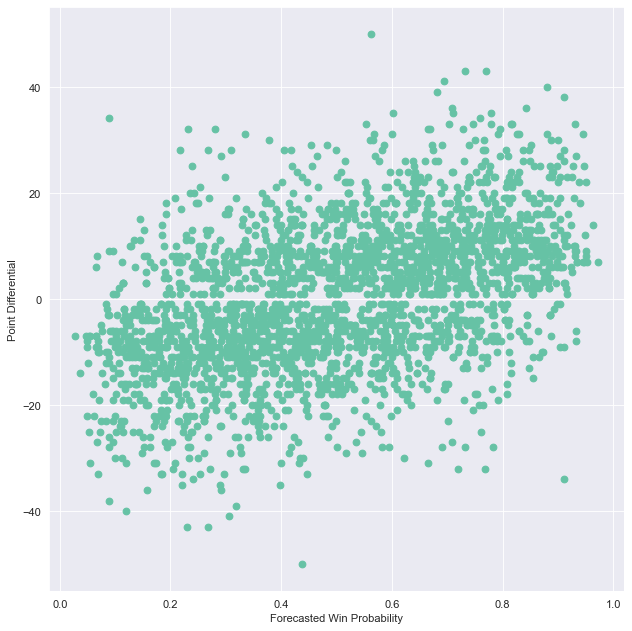

In [251]:
figure(figsize = (8, 8), dpi=80)
plt.scatter(x = nba_2010['forecast'], y = nba_2010['point_diff'])
plt.xlabel('Forecasted Win Probability')
plt.ylabel('Point Differential')
plt.tight_layout()
plt.show()


#### Explanation:

#### The Scatter Plot indicates about the relationship between `Forecasted Win Probability` and `Point Differential`: 

#### 1) Positive Trend: both variables increases
#### 2) Spread of Data: The points are spread out, particularly around the center of the plot. This indicates variability in the Point Differential for a given Forecasted Win Probability. While higher probabilities generally correspond to higher point differentials, there are still many instances where the point differential is negative or significantly lower than expected.
#### 3) Outliers: There may be some outliers, particularly in the lower Forecasted Win Probability range, where the Point Differential is quite low or negative. This suggests that some teams with low win probabilities can still have large margins of defeat.
#### 4) Distribution: The distribution of points appears to be somewhat homogenous across the range of Forecasted Win Probability, indicating that the relationship is consistent across different levels of win probability.
#### 5) Non-linear Patterns: While the overall trend is positive, the relationship does not appear perfectly linear. This suggests that other factors might influence the Point Differential, and a more complex model might be needed to capture the relationship fully.
#### Conclusion: the scatter plot provides a visual representation of the moderate positive correlation between the two variables, highlighting both the general trend and the variability in the data.